In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [15]:
# percentage of smoking population in U.S by state
cig_usage = pd.read_csv('cigarette_use_us.csv')
cig_usage['State']= cig_usage['State'].map(us_state_abbrev).str.lower()

In [13]:
# U.S. Covid-19 dataset by state
covid_us_data = pd.read_csv('us_covid_state.csv')
covid_us_data['State']= covid_us_data['State'].map(us_state_abbrev).str.lower()

In [5]:
# merge cig_usage and covid_us_data based on state column
merge_covid_data = covid_us_data.merge(cig_usage, on="State")

# create new dataframe with the columns needed for this analysis
covid_smoke_vs_death = merge_covid_data[['State','Total Cases', 'Total Deaths', 'Death Rate per 100000', 'Data_Value']]
covid_smoke_vs_death = covid_smoke_vs_death.rename(columns={'Data_Value': 'pct_smoking'})
# create column the percentage of death rate, (died) / (covid positive)
def death_rate (row):
    return row['Total Deaths'] / row['Total Cases'] * 100

covid_smoke_vs_death['death_rate'] = covid_smoke_vs_death.apply (lambda row: death_rate(row), axis=1)

covid_smoke_vs_death

,State,Total Cases,Total Deaths,Death Rate per 100000,pct_smoking,death_rate
0,ak,31323,120,16,19.1,0.383105
1,al,249524,3578,73,19.2,1.433930
2,ar,157359,2502,83,22.7,1.589995
3,az,326817,6639,92,14.0,2.031412
4,ca,1212968,19141,48,11.2,1.578030
5,co,232905,3037,53,14.5,1.303965
6,ct,117295,5020,140,12.2,4.279807
7,dc,21552,680,96,13.8,3.155160
8,de,36343,777,80,16.5,2.137963
9,fl,983370,18597,87,14.5,1.891150


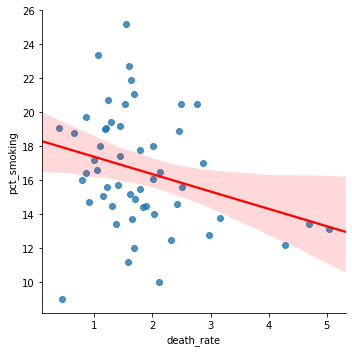

In [16]:
# Scatter plot of pct_smoking vs death rate
sns.lmplot(data=covid_smoke_vs_death, x="death_rate", y="pct_smoking", fit_reg=True,line_kws={'color': 'red'})

In [17]:
median_age = {
    'Alabama': 39.4,
    'Alaska': 35,
    'Arizona': 38.3,
    'Arkansas': 38.8,
    'California': 37,
    'Colorado': 37.1,
    'Connecticut': 41.2,
    'Delaware': 41.4,
    'District of Columbia': 34.3,
    'Florida': 42.4,
    'Georgia': 37.2,
    'Hawaii': 39.6,
    'Idaho': 36.9,
    'Illinois': 38.6,
    'Indiana': 38,
    'Iowa': 38.5,
    'Kansas': 37.2,
    'Kentucky': 39.2,
    'Louisiana': 37.7,
    'Maine': 45.1,
    'Maryland': 39,
    'Massachusetts': 39.7,
    'Michigan': 39.8,
    'Minnesota': 38.4,
    'Mississippi': 38.3,
    'Missouri': 38.9,
    'Montana': 40.5,
    'Nebraska': 36.8,
    'Nevada': 38.4,
    'New Hampshire': 43,
    'New Jersey': 40.2,
    'New Mexico': 38.6,
    'New York': 39.2,
    'North Carolina': 39.1,
    'North Dakota': 35.5,
    'Ohio': 39.6,
    'Oklahoma': 37,
    'Oregon': 39.7,
    'Pennsylvania': 40.8,
    'Puerto Rico': 43.1,
    'Rhode Island': 40.1,
    'South Carolina': 39.9,
    'South Dakota': 37.7,
    'Tennessee': 39,
    'Texas': 35.1,
    'Utah': 31.2,
    'Vermont': 42.8,
    'Virginia': 38.5,
    'Washington': 37.9,
    'West Virginia': 42.9,
    'Wisconsin': 39.9,
    'Wyoming': 38.1
}

In [18]:
# median age of U.S. dataset
median_age_us = pd.DataFrame.from_dict(median_age, orient='index', columns=['median_age'])
median_age_us['State'] = median_age_us.index

median_age_us['State']= median_age_us['State'].map(us_state_abbrev).str.lower()

In [27]:
# merge median_age_us dataset to ones above
covid_smoke_vs_death = covid_smoke_vs_death.merge(median_age_us, on='State')

In [28]:
covid_smoke_vs_death

,State,Total Cases,Total Deaths,Death Rate per 100000,pct_smoking,death_rate,median_age
0,ak,31323,120,16,19.1,0.383105,35.0
1,al,249524,3578,73,19.2,1.433930,39.4
2,ar,157359,2502,83,22.7,1.589995,38.8
3,az,326817,6639,92,14.0,2.031412,38.3
4,ca,1212968,19141,48,11.2,1.578030,37.0
5,co,232905,3037,53,14.5,1.303965,37.1
6,ct,117295,5020,140,12.2,4.279807,41.2
7,dc,21552,680,96,13.8,3.155160,34.3
8,de,36343,777,80,16.5,2.137963,41.4
9,fl,983370,18597,87,14.5,1.891150,42.4


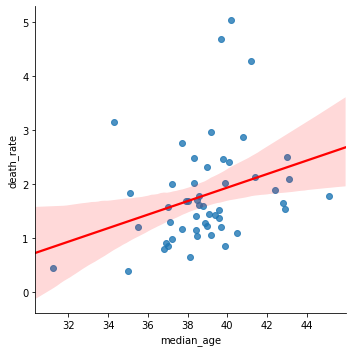

In [29]:
sns.lmplot(data=covid_smoke_vs_death, x="median_age", y="death_rate", line_kws={'color': 'red'})

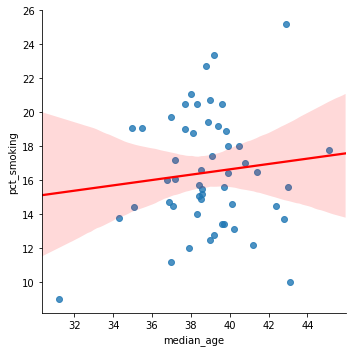

In [30]:
sns.lmplot(data=covid_smoke_vs_death, x="median_age", y="pct_smoking", line_kws={'color': 'red'})